# **Import Libraries**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import re

# **Loading** **data**

In [60]:
columns = [ 'Title' , 'Genre' , 'Description']
column = ['Title' , 'Description']

In [61]:
train_set= pd.read_csv('Genre Classification Dataset/train_data.txt',delimiter=':::',engine='python', names=columns,index_col=0 )

In [62]:
test_set=pd.read_csv('Genre Classification Dataset/test_data.txt', delimiter=':::', engine='python',names=columns, index_col=0 )

# **Data** **Preprocessing**

In [63]:
train_set.loc[:,'Description'] = train_set['Description'].astype(str).str.lower()
test_set.loc[:,'Description'] = test_set['Description'].astype(str).str.lower()

In [64]:
#train_set.drop(columns=['Title'], inplace=True)
#test_set.drop(columns=['Title'], inplace=True)

In [65]:
train_set.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-re...


In [66]:
test_set.head()

,Genre,Description
Title,,
1,Edgar's Lunch (1998),"l.r. brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"spain, march 1964: quico is a very naughty ch..."
3,Off the Beaten Track (2010),one year in the life of albin and his family ...
4,Meu Amigo Hindu (2015),"his father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),before he was known internationally as a mart...


In [67]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [68]:
train_set.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54085
top,Oscar et la dame rose (2009),drama,grammy - music award of the american academy ...
freq,1,13613,12


In [69]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [70]:
test_set.describe()

,Genre,Description
count,54200,54200
unique,54200,54071
top,Edgar's Lunch (1998),grammy - music award of the american academy ...
freq,1,10


In [71]:
print(train_set.duplicated().sum())
print(test_set.duplicated().sum())

0
0


In [72]:
train_set=train_set.drop_duplicates()
test_set=test_set.drop_duplicates()

In [73]:
print(train_set.shape)
print(test_set.shape)

(54214, 3)
(54200, 2)


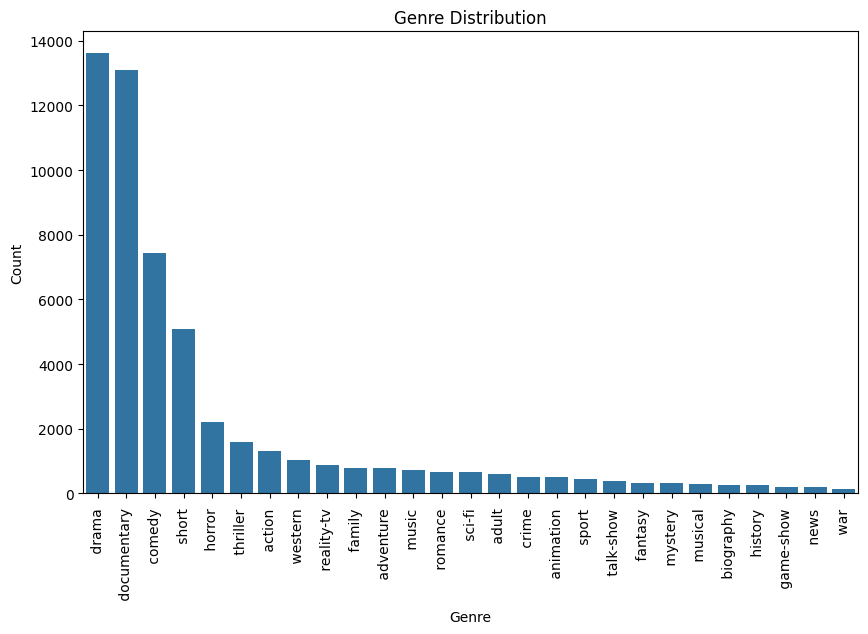

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=train_set , order=train_set['Genre'].value_counts().index )
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [75]:
x_train=train_set['Description']
y_train=train_set['Genre']
x_test=test_set['Description']
y_test=test_set['Genre']



In [76]:
print(x_train.shape)
print(y_train.shape)

(54214,)
(54214,)


In [77]:
print(x_test.shape)
print(y_test.shape)

(54200,)
(54200,)


# **Feature Engineering**

In [78]:
def cleaning_data(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r"\s+", " ", text).strip()
    return text
x_train=x_train.apply(cleaning_data)
x_test=x_test.apply(cleaning_data)

In [79]:
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

# **splitting** **the** **dataset**

In [80]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

# **Model Training**

In [81]:
nb=MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

# **Model Evaluation**

In [82]:
y_pred=nb.predict(X_val)

In [83]:
accuracy_train=accuracy_score(Y_val, y_pred)
print("Train accuracy:", accuracy_train)
print("Train classification report:")
print(classification_report(Y_val, y_pred,zero_division=0))

Train accuracy: 0.5231946878170248
Train classification report:
               precision    recall  f1-score   support

      action        0.58      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.31      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.38      0.50       431
       music        0.77      0.14      0.24       144
     musical        0.00      0.00      0.00        50
